Dataset Shape: (5001, 8)

First 5 rows:
    long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------               

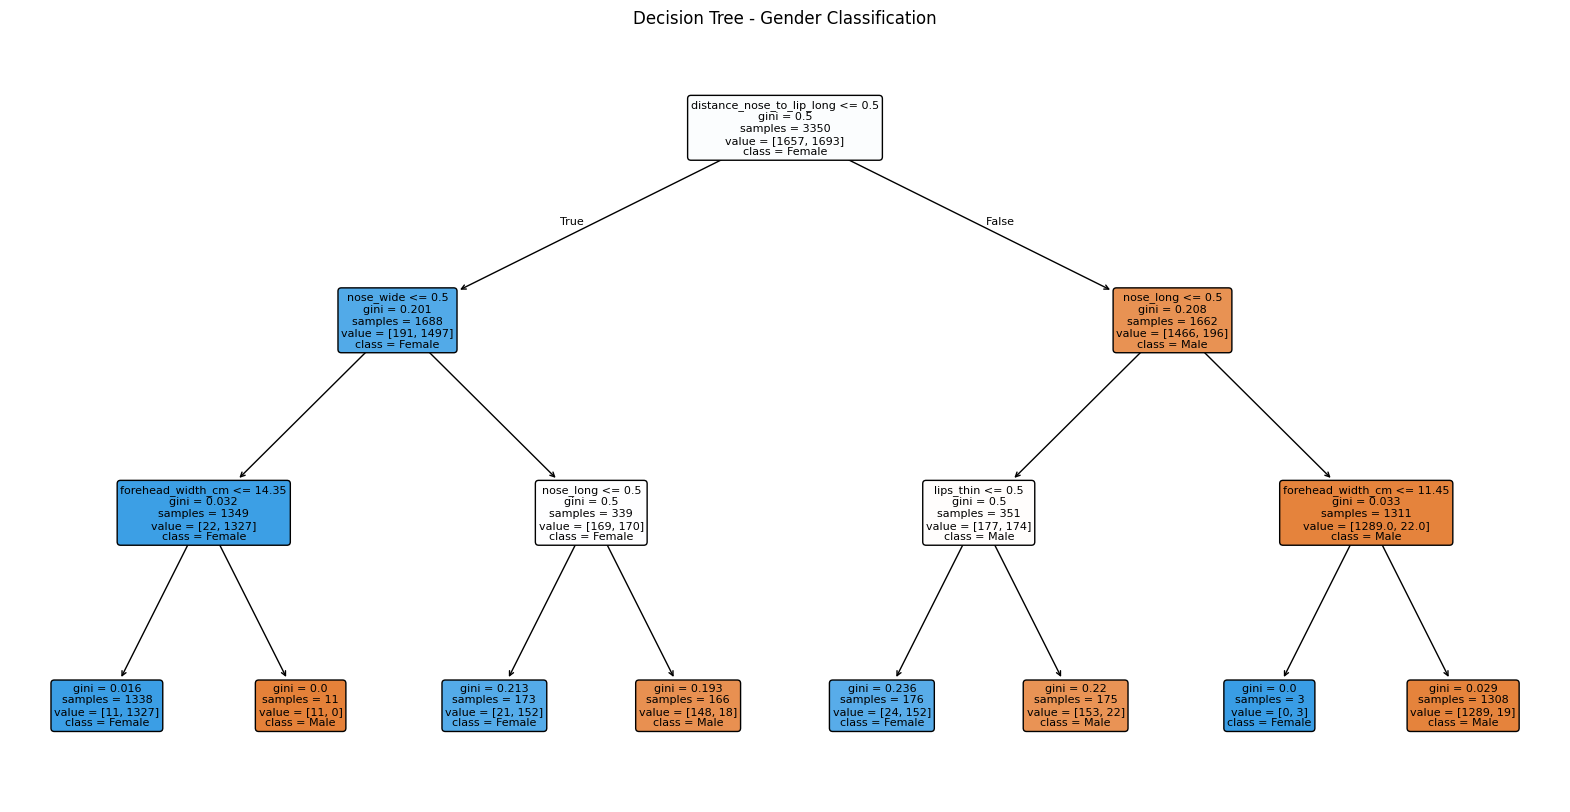

<ipython-input-1-9ed1dc85ea84>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='Blues')
<ipython-input-1-9ed1dc85ea84>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Oranges')


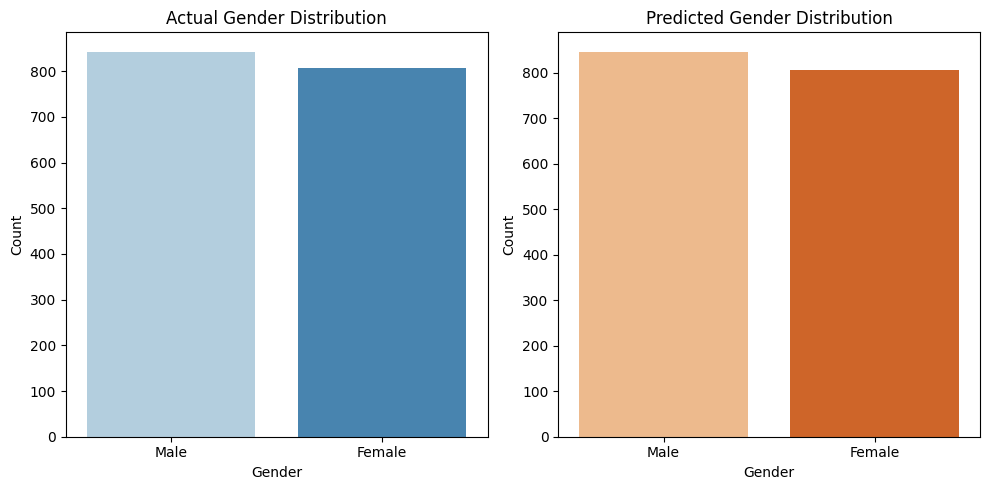

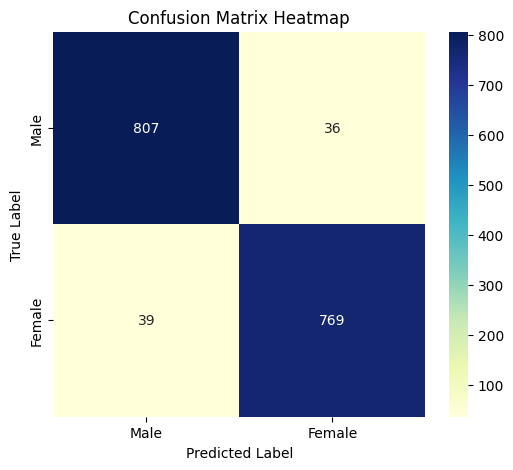

In [1]:
# Gender Classification using Decision Tree Classifier

# 1. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading the Dataset
df = pd.read_csv("gender_classification_v7.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nInfo:\n")
df.info()

# 3. Data Preprocessing

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode target variable 'gender' (assuming it's binary: Male/Female)
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Separate features and target
X = df.drop('gender', axis=1)
y = df['gender']

# Split into training and testing sets (67% train, 33% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 4. Training the Decision Tree Model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 5. Making Predictions
y_pred = clf.predict(X_test)

# 6. Model Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Visualization of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['Male', 'Female'], filled=True, rounded=True)
plt.title("Decision Tree - Gender Classification")
plt.show()

# 8. Visualization: Actual vs Predicted

# Barplot - Count of Actual vs Predicted
plt.figure(figsize=(10, 5))

# Actual gender distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, palette='Blues')
plt.title("Actual Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Count")

# Predicted gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_pred, palette='Oranges')
plt.title("Predicted Gender Distribution")
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# 9. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()
